# Курсовая работа

## Источник данных

[Spaceship Titanic](https://www.kaggle.com/competitions/spaceship-titanic/data)

### Dataset Description
In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

### File and Data Field Descriptions

* **train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

* **test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

* **sample_submission.csv** - A submission file in the correct format.

- PassengerId - Id for each passenger in the test set.
- Transported - The target. For each passenger, predict either True or False.

## Exploratory Data Analysis

### Columns modification

- PassengerId - (???) split into two part: group number and number in group 

- HomePlanet - code with dummy, NaN - оставляем как есть

- CryoSleep - change to 0/1

- Cabin - split into three part: Deck Num Side

- Destination - code with dummy, NaN - оставляем как есть

- Age - OK, NaN заменим на (-999)

- VIP - change to 0/1, NaN - заменяем на 0

- RoomService - OK, NaN - заменяем на 0

- FoodCourt - OK, NaN - заменяем на 0

- ShoppingMall - OK, NaN - заменяем на 0

- Spa - OK, NaN - заменяем на 0

- VRDeck - OK

- Name - remove

- Transported - bool - OK  

In [366]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.svm import NuSVC, SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, StackingClassifier

RANDOM_STATE = 84


In [367]:
data = pd.read_csv('train.csv', index_col=0)
data.head(100) 

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0103_01,Earth,False,F/24/S,TRAPPIST-1e,24.0,False,0.0,NaN,0.0,0.0,17.0,Arlen Mclainez,True
0103_02,Earth,True,G/18/S,55 Cancri e,9.0,False,0.0,0.0,0.0,0.0,0.0,Shaele Mclainez,True
0103_03,Earth,True,G/18/S,TRAPPIST-1e,6.0,False,0.0,0.0,0.0,0.0,0.0,Fanne Mclainez,False


In [368]:
data.describe(include='all')

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Glena Hahnstonsen,True
freq,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [369]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


In [370]:
data.isna().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [371]:
data.groupby(['Transported'])['Transported'].count()


Transported
False    4315
True     4378
Name: Transported, dtype: int64

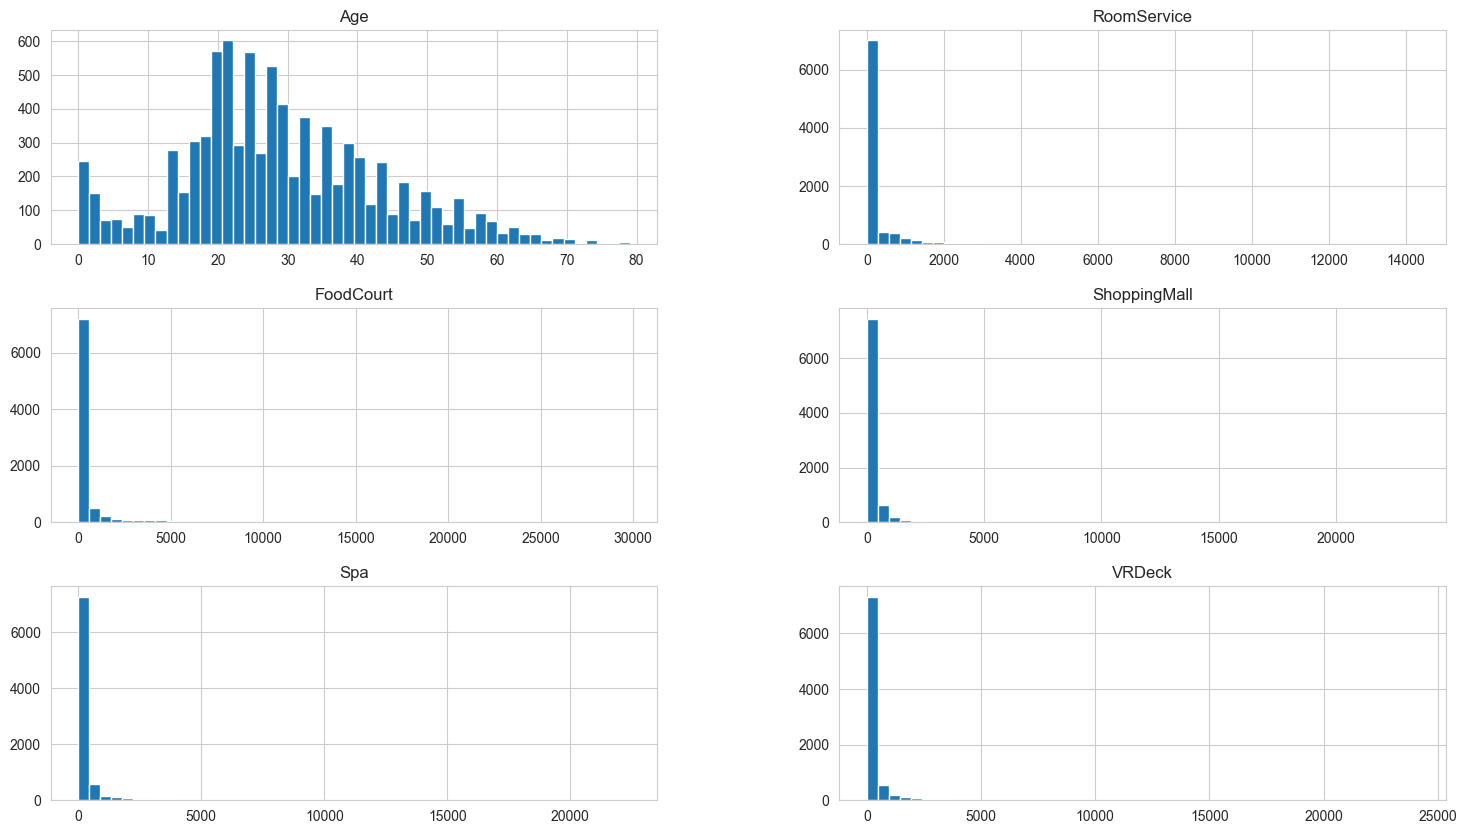

In [372]:
data.hist(figsize=(18, 10),bins=50);


array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

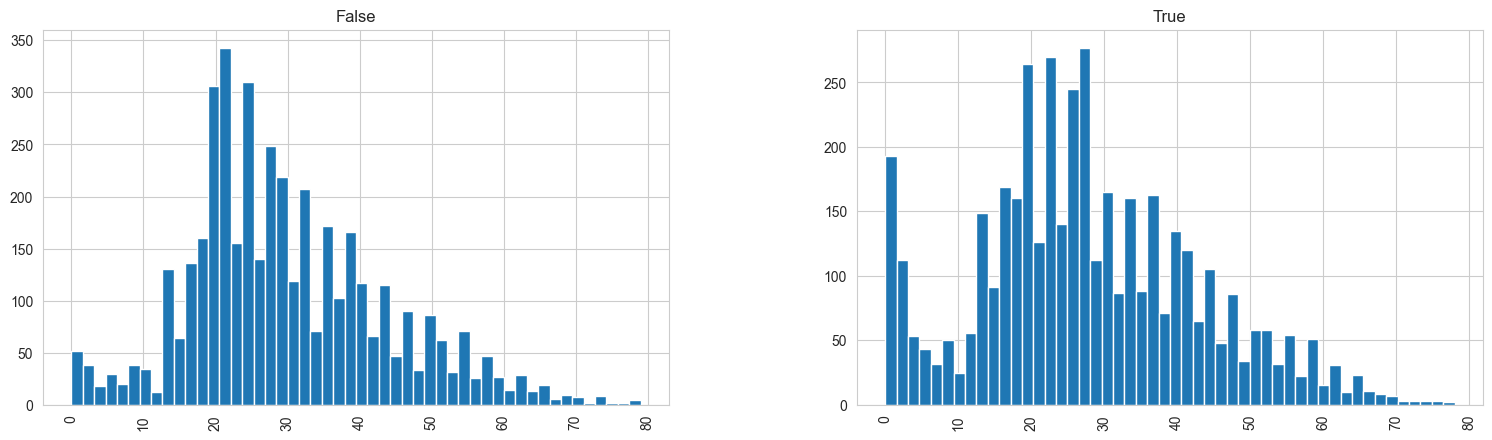

In [373]:
data.hist(['Age'],bins=50,by='Transported',figsize=(18, 5))

array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

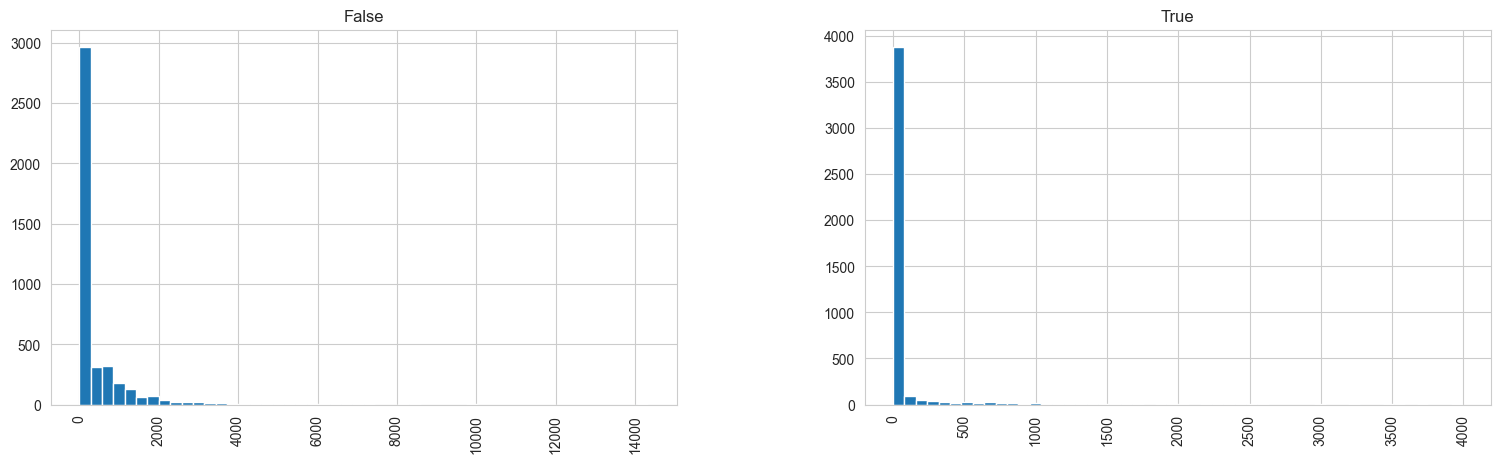

In [374]:
data.hist(['RoomService'],bins=50,by='Transported',figsize=(18, 5))

array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

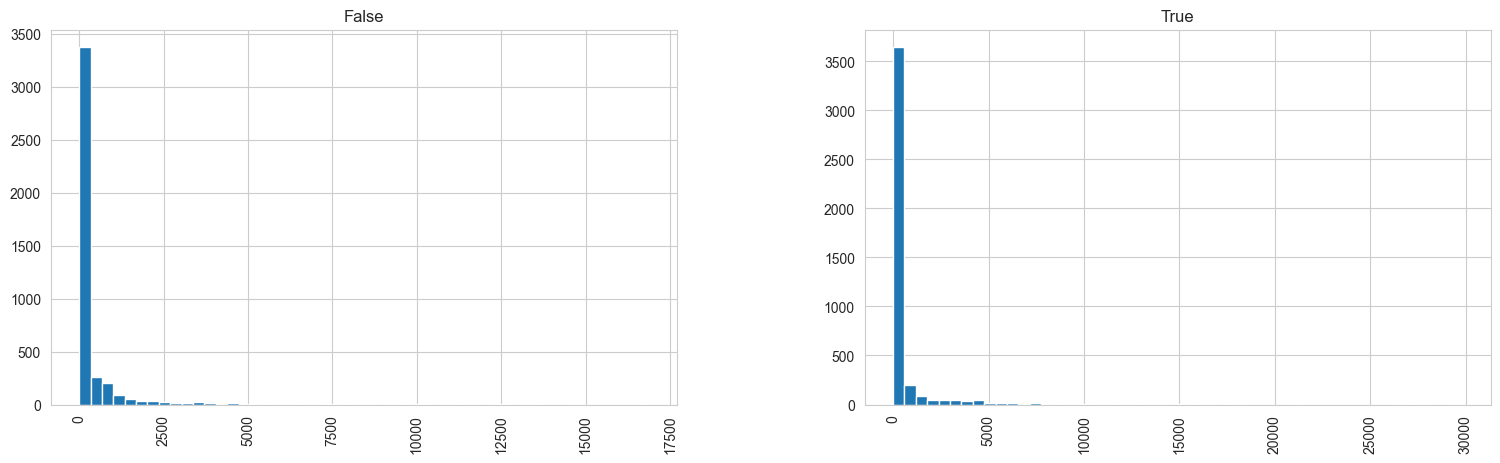

In [375]:
data.hist(['FoodCourt'],bins=50,by='Transported',figsize=(18, 5))


array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

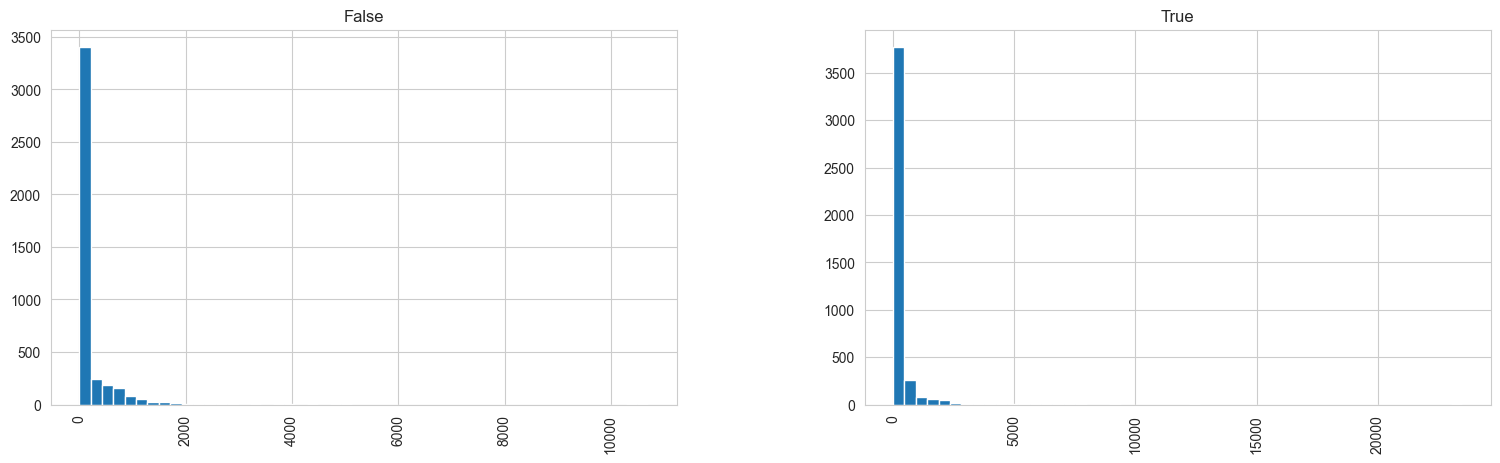

In [376]:
data.hist(['ShoppingMall'],bins=50,by='Transported',figsize=(18, 5))

array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

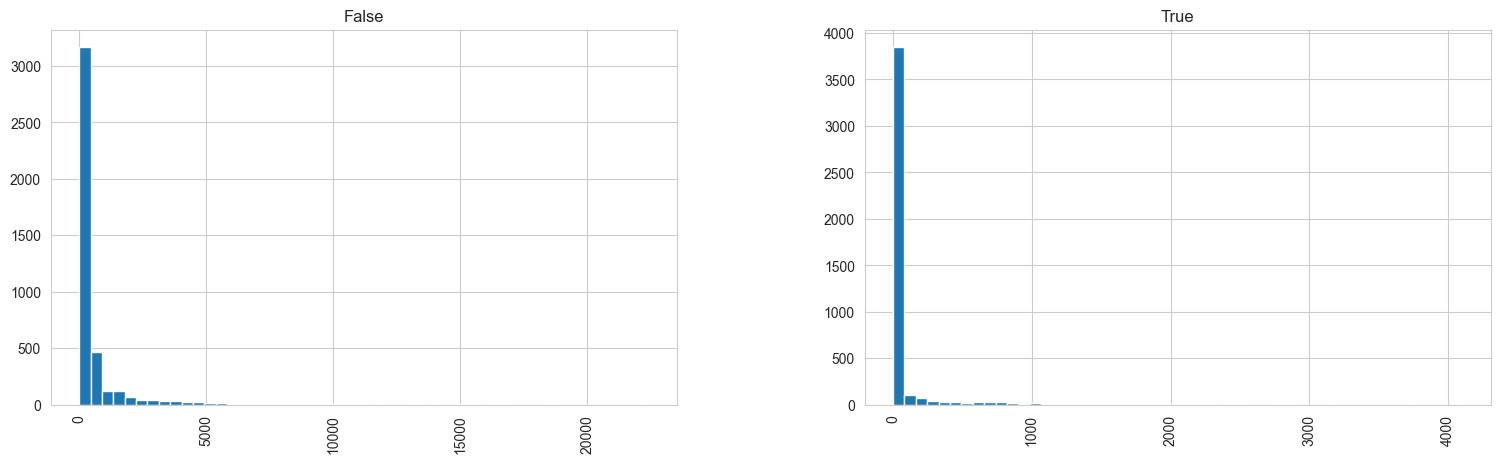

In [377]:
data.hist(['Spa'],bins=50,by='Transported',figsize=(18, 5))


array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

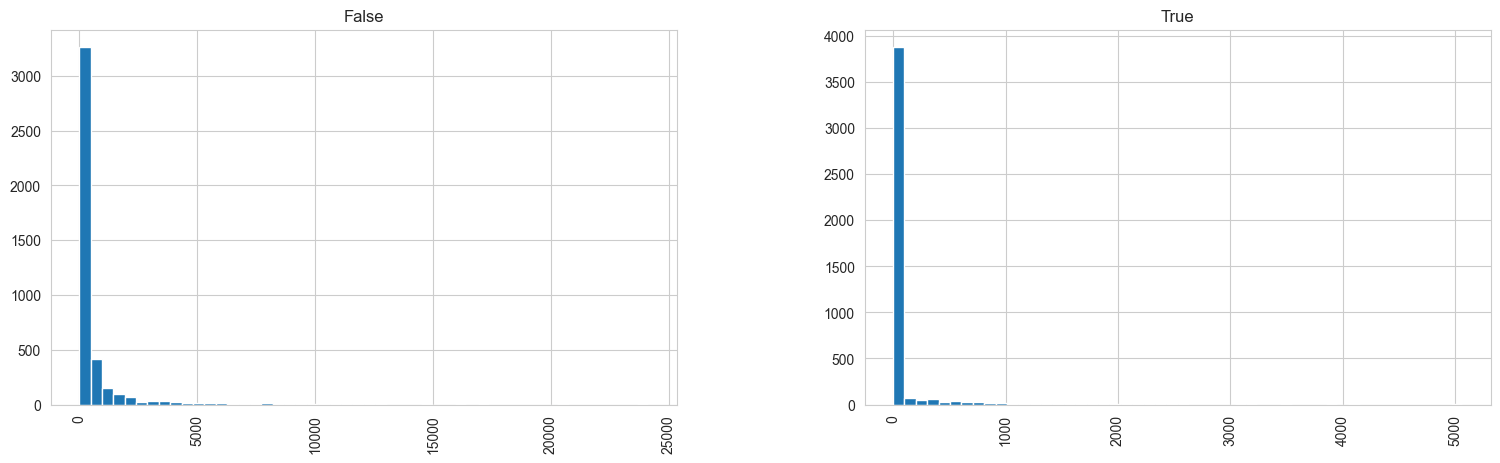

In [378]:
data.hist(['VRDeck'],bins=50,by='Transported',figsize=(18, 5))


array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

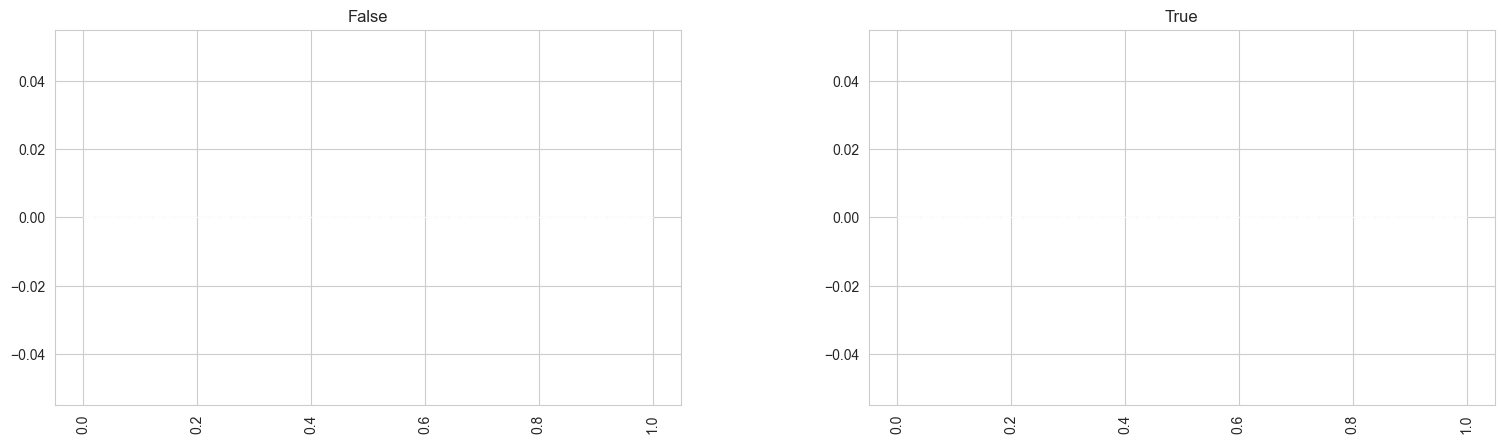

In [379]:
data.hist(['VIP'],bins=50,by='Transported',figsize=(18, 5))

array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

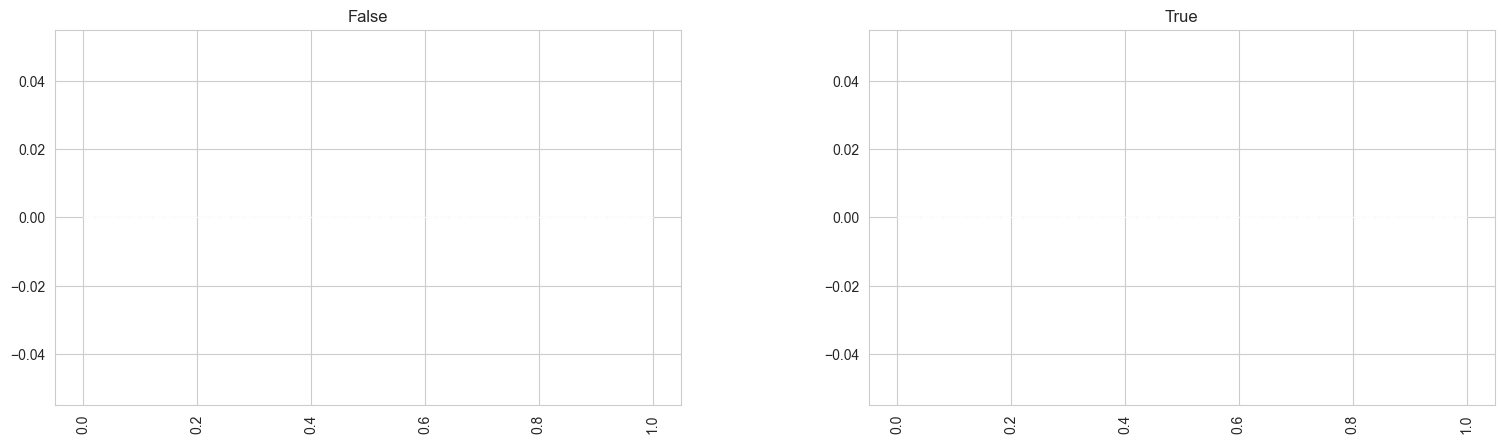

In [380]:
data.hist(['CryoSleep'],bins=50,by='Transported',figsize=(18, 5))
# Looks like it's very important feature 

array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

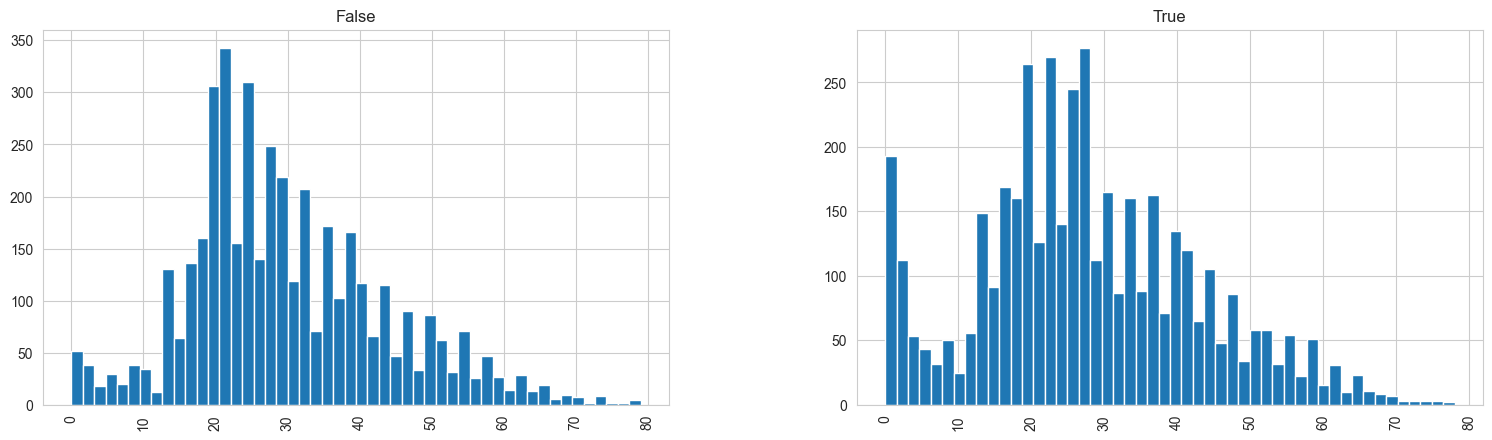

In [381]:
data.hist(['Age'],bins=50,by='Transported',figsize=(18, 5))


### Data preparation

In [382]:
# Let prepeare passenger id
data['PassengerNum'] = data.index
data_passenger=data['PassengerNum'].str.split('_', n=1, expand=True).rename(columns={0: "GroupNum", 1: "NumInGroup" })
data_passenger[["GroupNum", "NumInGroup"]] = data_passenger[["GroupNum", "NumInGroup"]].apply(pd.to_numeric)
# add group number and number in group
data=data.join(data_passenger,how='left')
data_groups = data_passenger.groupby(['GroupNum']).count()
data_groups.rename(columns={'NumInGroup': 'Count'}, inplace=True)
data = data.join(data_groups, how='left', on='GroupNum')
data = data.drop('PassengerNum', axis=1).drop('GroupNum', axis=1).drop('NumInGroup', axis=1)


# CryoSleep - change to 0/1, NaN - replace with False
pd.set_option('future.no_silent_downcasting', True)
data.loc[:, 'CryoSleep'] = data.CryoSleep.replace({False: 0, True: 1})
data.loc[:, 'CryoSleep'] = data.CryoSleep.fillna(True)

# Cabin - split into three part: Deck Num Side
data_cabin=data['Cabin'].str.split('/', n=2, expand=True).rename(columns={0: "Deck", 1: "Num", 2: "Side" })
data=data.join(data_cabin,how='left')

#Age - OK, NaN replace with smth
data.loc[:, 'Age'] = data.Age.fillna(100)

# VIP - change to 0/1, NaN - replace with False
#with pd.set_option("future.no_silent_downcasting", True):
data.loc[:, 'VIP'] = data.VIP.replace({False: 0, True: 1})
data.loc[:, 'VIP'] = data.VIP.infer_objects(copy=False).fillna(False)


# RoomService - OK, NaN - replace with 0
# FoodCourt - OK, NaN - replace with 0
# ShoppingMall - OK, NaN - replace with 0
# Spa - OK, NaN - replace with 0
# VRDeck - OK
data.loc[:, 'RoomService'] = data.RoomService.fillna(0)
data.loc[:, 'FoodCourt'] = data.FoodCourt.fillna(0)
data.loc[:, 'ShoppingMall'] = data.ShoppingMall.fillna(0)
data.loc[:, 'Spa'] = data.Spa.fillna(0)
data.loc[:, 'VRDeck'] = data.VRDeck.fillna(0)


data[["CryoSleep", "VIP"]] = data[["CryoSleep", "VIP"]].apply(pd.to_numeric)

# Add name length
namelendf = data['Name'].str.len()
data = data.join(namelendf.rename('NameLen'), how='left')
data.loc[:, 'NameLen'] = data.NameLen.fillna(0)

# Drop column
# Name  - unique field
# Num  - 1817 unique values, so it's almost unique field
data = data.drop('Name', axis=1).drop('Num', axis=1).drop('Cabin', axis=1)

In [383]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8693 non-null   int64  
 2   Destination   8511 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   float64
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Count         8693 non-null   int64  
 12  Deck          8494 non-null   object 
 13  Side          8494 non-null   object 
 14  NameLen       8693 non-null   float64
dtypes: bool(1), float64(8), int64(2), object(4)
memory usage: 1.3+ MB


array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

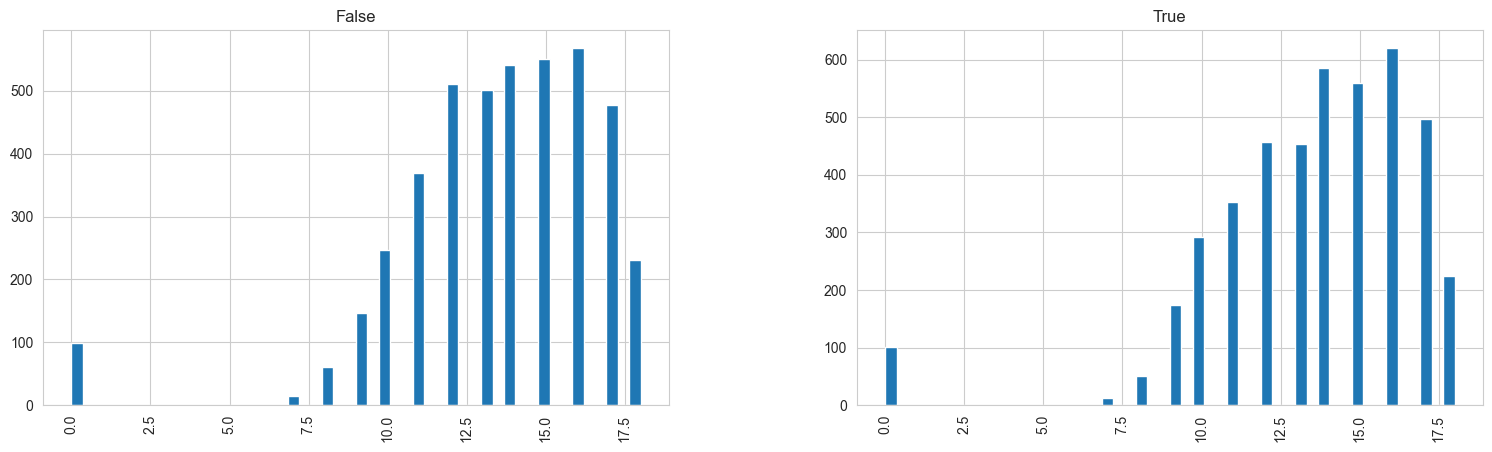

In [384]:
data.hist(['NameLen'],bins=50,by='Transported',figsize=(18, 5))

array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

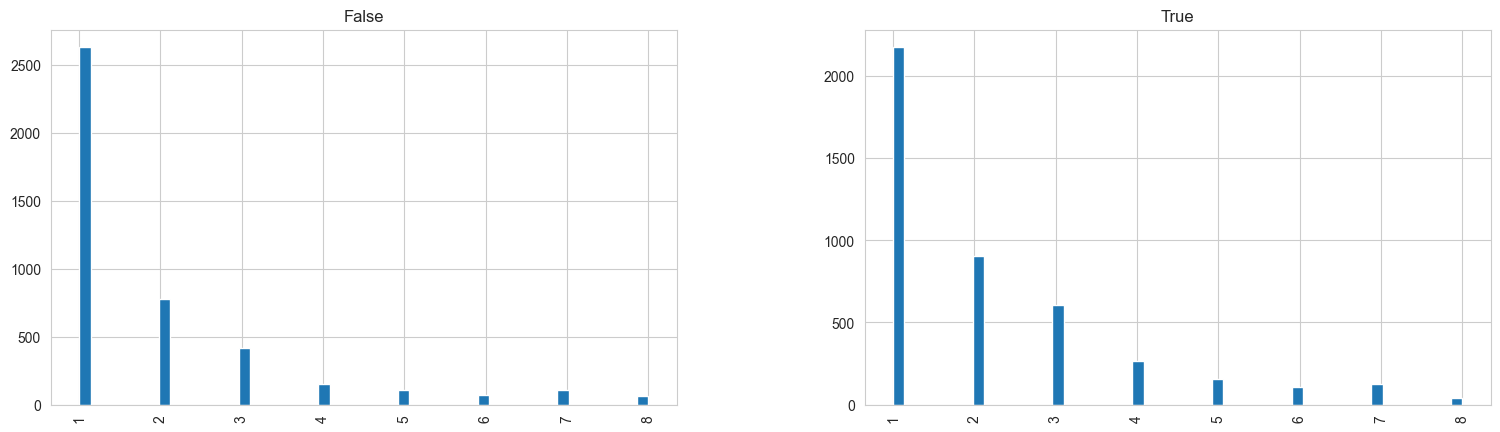

In [385]:
data.hist(['Count'],bins=50,by='Transported',figsize=(18, 5))


### A bit more analysis


In [386]:
data.groupby(['Deck','Transported'])['Transported'].count()

Deck  Transported
A     False           129
      True            127
B     False           207
      True            572
C     False           239
      True            508
D     False           271
      True            207
E     False           563
      True            313
F     False          1565
      True           1229
G     False          1238
      True           1321
T     False             4
      True              1
Name: Transported, dtype: int64

In [387]:
data.groupby(['Transported','Side'])['Transported'].count()
# Looks like it's very important feature 

Transported  Side
False        P       2308
             S       1908
True         P       1898
             S       2380
Name: Transported, dtype: int64

In [388]:
data.groupby(['Transported','Destination'])['Transported'].count()
# a тут есть какая то зависимость

Transported  Destination  
False        55 Cancri e       702
             PSO J318.5-22     395
             TRAPPIST-1e      3128
True         55 Cancri e      1098
             PSO J318.5-22     401
             TRAPPIST-1e      2787
Name: Transported, dtype: int64


### Encoder

In [389]:
categorical_feature = ['HomePlanet','Destination','Deck', 'Side']
enc = OrdinalEncoder()

data[categorical_feature] = enc.set_params(encoded_missing_value=-1).fit_transform(data[categorical_feature])

In [390]:
data.head(100)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Count,Deck,Side,NameLen
PassengerId,,,,,,,,,,,,,,,
0001_01,1.0,0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,False,1,1.0,0.0,15.0
0002_01,0.0,0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,True,1,5.0,1.0,12.0
0003_01,1.0,0,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,False,2,0.0,1.0,13.0
0003_02,1.0,0,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,False,2,0.0,1.0,12.0
0004_01,0.0,0,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,True,1,5.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0103_01,0.0,0,2.0,24.0,0.0,0.0,0.0,0.0,0.0,17.0,True,3,5.0,1.0,14.0
0103_02,0.0,1,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,True,3,6.0,1.0,15.0
0103_03,0.0,1,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,False,3,6.0,1.0,14.0


In [391]:
data.head(100)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Count,Deck,Side,NameLen
PassengerId,,,,,,,,,,,,,,,
0001_01,1.0,0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,False,1,1.0,0.0,15.0
0002_01,0.0,0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,True,1,5.0,1.0,12.0
0003_01,1.0,0,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,False,2,0.0,1.0,13.0
0003_02,1.0,0,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,False,2,0.0,1.0,12.0
0004_01,0.0,0,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,True,1,5.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0103_01,0.0,0,2.0,24.0,0.0,0.0,0.0,0.0,0.0,17.0,True,3,5.0,1.0,14.0
0103_02,0.0,1,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,True,3,6.0,1.0,15.0
0103_03,0.0,1,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,False,3,6.0,1.0,14.0


In [392]:
data.describe(include='all')

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Count,Deck,Side,NameLen
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693,8693.000000,8693.000000,8693.000000,8693.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4378,NaN,NaN,NaN,NaN
mean,0.626711,0.374324,1.431497,30.293455,0.022892,220.009318,448.434027,169.572300,304.588865,298.261820,NaN,2.035546,4.183941,0.470378,13.515357
std,0.827623,0.483976,0.886083,17.543570,0.149568,660.519050,1595.790627,598.007164,1125.562559,1134.126417,NaN,1.596347,1.928570,0.543084,3.257919
min,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,-1.000000,-1.000000,0.000000
25%,0.000000,0.000000,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,3.000000,0.000000,12.000000
50%,0.000000,0.000000,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,5.000000,0.000000,14.000000
75%,1.000000,1.000000,2.000000,39.000000,0.000000,41.000000,61.000000,22.000000,53.000000,40.000000,NaN,3.000000,6.000000,1.000000,16.000000


In [393]:
data.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Count           0
Deck            0
Side            0
NameLen         0
dtype: int64

### Discovery


In [394]:
data['Transported'].value_counts(normalize=True)

Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64

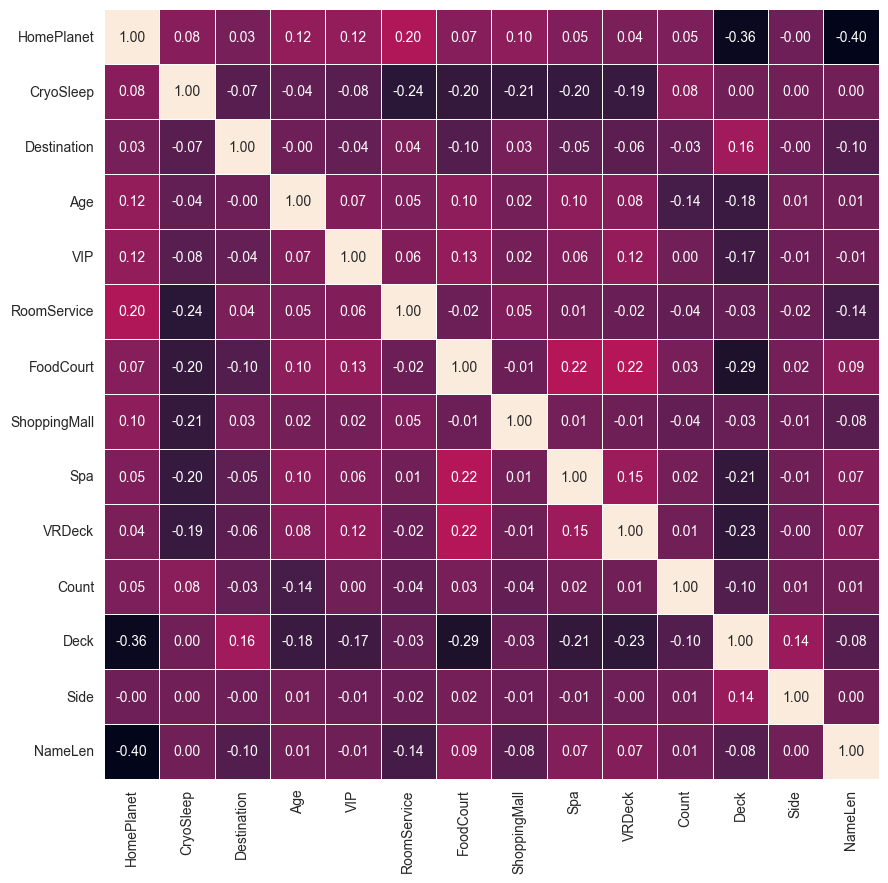

In [395]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.drop('Transported', axis=1).corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()
# The passengers from Europe are located on the desks B,C mostly. They are like spend money as well)
# The passengers from Earth are located on the desk G mostly
# The passengers from Mars are located on the desk G mostly


## Let's start the main action

### Remove columns just for repots

In [396]:
#data = data.drop('NameLen', axis=1)
#data = data.drop('Count', axis=1)
# data = data.drop('Deck=nan', axis=1)
# data = data.drop('Deck=B', axis=1)
# data = data.drop('Deck=C', axis=1)
# data = data.drop('Deck=D', axis=1)
# data = data.drop('Deck=E', axis=1)
# data = data.drop('Deck=F', axis=1)
# data = data.drop('Deck=G', axis=1)
# data = data.drop('Deck=T', axis=1)
# data = data.drop('Side=nan', axis=1)
# data = data.drop('Side=S', axis=1)




### Split

In [397]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Transported', axis=1), data['Transported'], test_size=0.3, random_state=RANDOM_STATE)

### Scaler

In [398]:
#scaler = RobustScaler()
scaler = StandardScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Array of models 
Let's create a list of the most common models

In [401]:
estimators = [('LogisticRegression',LogisticRegression(random_state=0, max_iter=10000)),
              ('GradientBoostingClassifier',GradientBoostingClassifier(random_state=0)),
              ('SVC',SVC(probability=True, random_state=RANDOM_STATE))]

estimator = RandomForestClassifier(random_state=0)

models = [KNeighborsClassifier(n_neighbors=11),
          LogisticRegression(C=0.001), 
          LogisticRegressionCV(Cs=np.logspace(-5, 20, 50), random_state=RANDOM_STATE, refit=True, scoring='accuracy',max_iter = 10000),
          DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2, criterion='gini'),
          NuSVC(),
          GradientBoostingClassifier(n_estimators=300, max_depth=2),
          BaggingClassifier(DecisionTreeClassifier(max_depth=3), n_jobs=-1, n_estimators=100),
          RandomForestClassifier(n_estimators=500, n_jobs=-1, max_depth = 3, oob_score=True),
          StackingClassifier(estimators=estimators, final_estimator=estimator)]

results = []

for model in models:
    model.fit(X_train_scaled, y_train)
    results.append([type(model),accuracy_score(model.predict(X_train_scaled), y_train),accuracy_score(model.predict(X_test_scaled), y_test)] )
    print(type(model),' - finished')
df = pd.DataFrame(results, columns=['Type', 'TrainAccuracy','TestAccuracy'])

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>  - finished
<class 'sklearn.linear_model._logistic.LogisticRegression'>  - finished
<class 'sklearn.linear_model._logistic.LogisticRegressionCV'>  - finished
<class 'sklearn.tree._classes.DecisionTreeClassifier'>  - finished
<class 'sklearn.svm._classes.NuSVC'>  - finished
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>  - finished
<class 'sklearn.ensemble._bagging.BaggingClassifier'>  - finished
<class 'sklearn.ensemble._forest.RandomForestClassifier'>  - finished
<class 'sklearn.ensemble._stacking.StackingClassifier'>  - finished


In [400]:
df

,Type,TrainAccuracy,TestAccuracy
0,<class 'sklearn.neighbors._classification.KNei...,0.806409,0.771089
1,<class 'sklearn.linear_model._logistic.Logisti...,0.762202,0.766104
2,<class 'sklearn.linear_model._logistic.Logisti...,0.783402,0.788727
3,<class 'sklearn.tree._classes.DecisionTreeClas...,0.785045,0.775307
4,<class 'sklearn.svm._classes.NuSVC'>,0.802136,0.796012
5,<class 'sklearn.ensemble._gb.GradientBoostingC...,0.842071,0.798696
6,<class 'sklearn.ensemble._bagging.BaggingClass...,0.765818,0.756902
7,<class 'sklearn.ensemble._forest.RandomForestC...,0.742317,0.738880
8,<class 'sklearn.ensemble._stacking.StackingCla...,0.815448,0.781442
